In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import utils.behavioral_utils as behavioral_utils
import utils.visualization_utils as visualization_utils

import utils.spike_utils as spike_utils
import utils.io_utils as io_utils
import os
from distutils.util import strtobool

import argparse
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from constants.behavioral_constants import *

from scipy import stats


In [2]:
sub = "SA"
SESSIONS_PATH = "/data/patrick_res/sessions/{sub}/valid_sessions.pickle"
session = 20180802
beh = behavioral_utils.get_valid_belief_beh_for_sub_sess(sub, session)
sub_beh = beh[22:100]
sub_beh["TrialIdx"] = np.arange(len(sub_beh))

/tmp/ipykernel_1911192/4019914752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_beh["TrialIdx"] = np.arange(len(sub_beh))


In [6]:
sub_beh[sub_beh.Response == "Correct"]

,TrialNumber,BlockNumber,TrialAfterRuleChange,TaskInterrupt,ConditionNumber,Response,ItemChosen,TrialType,CurrentRule,LastRule,...,PreferredBelief,PreferredBeliefProb,BeliefStateValueLabel,PreferredChosen,PrevResponse,PrevColor,PrevShape,PrevPattern,session,TrialIdx
27,62,3,5,NaN,523,Correct,0.0,9,TRIANGLE,CIRCLE,...,GREEN,0.179868,Low,True,Incorrect,YELLOW,STAR,RIPPLE,20180802,4
34,69,3,12,NaN,298,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.237865,Low,True,Incorrect,GREEN,SQUARE,SWIRL,20180802,11
37,72,3,15,NaN,51,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.311031,Low,True,Incorrect,GREEN,SQUARE,RIPPLE,20180802,14
38,73,3,16,NaN,483,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.414001,Low,True,Correct,CYAN,TRIANGLE,RIPPLE,20180802,15
40,75,3,18,NaN,362,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.494661,Low,True,Incorrect,CYAN,SQUARE,RIPPLE,20180802,17
42,77,3,20,NaN,510,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.534981,Low,True,Incorrect,YELLOW,STAR,SWIRL,20180802,19
43,78,3,21,NaN,406,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.591741,High TRIANGLE,True,Correct,GREEN,TRIANGLE,ESCHER,20180802,20
44,79,3,22,NaN,432,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.668917,High TRIANGLE,True,Correct,YELLOW,TRIANGLE,SWIRL,20180802,21
45,80,3,23,NaN,485,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.698965,High TRIANGLE,True,Correct,YELLOW,TRIANGLE,SWIRL,20180802,22
47,82,3,25,NaN,524,Correct,0.0,9,TRIANGLE,CIRCLE,...,TRIANGLE,0.662859,High TRIANGLE,True,Incorrect,GREEN,SQUARE,RIPPLE,20180802,24


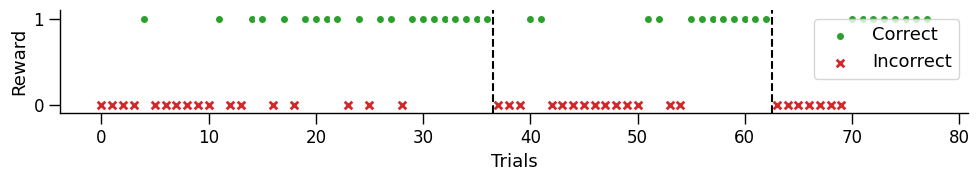

In [32]:
plt.rcParams.update({'font.size': 13})

fig, ax = plt.subplots(figsize=(10, 2))
cor = sub_beh[sub_beh.Response == "Correct"]
sns.scatterplot(
    cor, 
    x="TrialIdx", y=1, 
    color="tab:green",
    marker="o", s=65, linewidth=3, label="Correct",
    ax=ax
)
inc = sub_beh[sub_beh.Response == "Incorrect"]
sns.scatterplot(
    inc, 
    x="TrialIdx", y=0, 
    color="tab:red",
    marker="x", s=30, linewidth=2, label="Incorrect",
    ax=ax
)
block_switches = sub_beh[sub_beh.TrialAfterRuleChange == 0]
for i, switch in block_switches.iterrows():
    ax.axvline(switch.TrialIdx - 0.5, linestyle="--", color="black")

ax.set_ylim((-0.1, 1.1))
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1])
ax.legend()
ax.set_xlabel("Trials")
ax.set_ylabel("Reward")
visualization_utils.format_plot(ax, axislabelsize=13)
fig.tight_layout()

fig.savefig("/data/patrick_res/figures/wcst_paper/behavior/example_trials.png")
fig.savefig("/data/patrick_res/figures/wcst_paper/behavior/example_trials.svg")



In [31]:
sub_beh.groupby("BlockNumber").apply(lambda x: x.CurrentRule.iloc[0])

BlockNumber
3    TRIANGLE
4      RIPPLE
5        CYAN
dtype: object